In [33]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

In [34]:
import src
import src.features as lf
import src.models as lm
import src.visualization as lv
from src.models.models import *

lm.models.RECORD_DIR='./models/records'

### PATH 


In [35]:
PATH = './dataset/'


Data loading
---------

In [36]:
#### Data building
data = lf.data_builder.create_dataset_from_directory(PATH)


Model Loading
---------

In [37]:

#### Train Campaigns
campaign_id='test'

## **Stage 1**

### *```ResNetV2```*

In [38]:
#### Stage 1
stage1_resnet = Stage1ResNetv2(data)
stage1_resnet.fit_or_load(campaign_id, training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_ResNetv2 –– Loading


### *```MobileNetV3```*

In [39]:
stage1_mobilenet = Stage1MobileNetv3(data)
stage1_mobilenet.fit_or_load(campaign_id, training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-1_MobileNetv3 –– Loading


**Model evaluation**
-------

In [40]:
img = data.dataframe.iloc[8]
print(f"Pred : {stage1_mobilenet.single_prediction(img.path)}")
print(f"Actual : {img.label}")

>>> Stage-1_MobileNetv3 –– Evaluation
1/1 [==============================] - 1s 566ms/step
Pred : Common wheat
Actual : Black-grass


### *```MobileNetV2```*

In [ ]:
results = stage1_mobilenet.evaluate()
display(results)

### *```MobileNetV2 grad cam```*

>>> Stage-1_MobileNetv3 –– Display training data samples


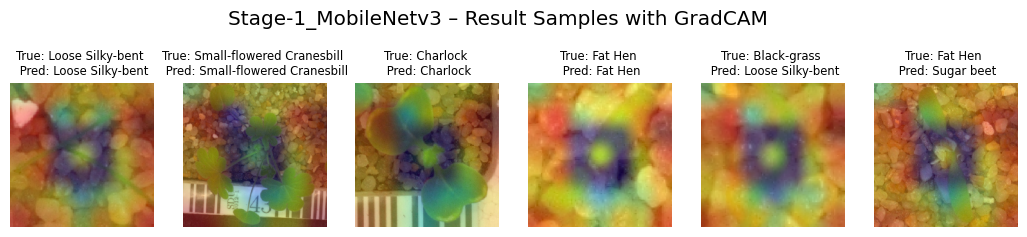

In [42]:
stage1_mobilenet.display_samples(nb=6, gradcam=True)

### *```ResNetV2 grad cam```*

>>> Stage-1_ResNetv2 –– Evaluation
18/18 [==============================] - 24s 1s/step
>>> Stage-1_ResNetv2 –– Display training data samples


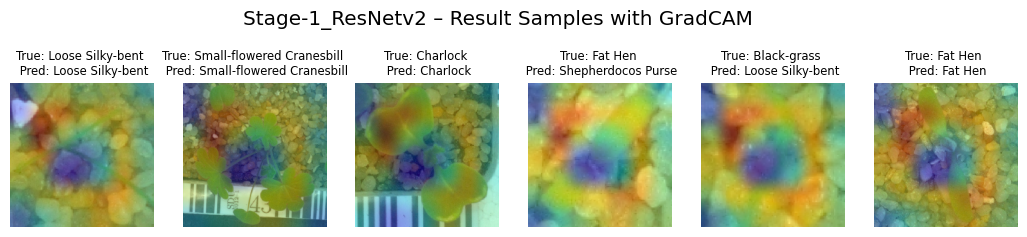

In [43]:
stage1_resnet.evaluate()
stage1_resnet.display_samples(nb=6, gradcam=True)

### *```ResNetV2 classification report```*

In [ ]:
stage1_resnet.print_classification_report();

### *```MobileNetV2 classification report```*

In [ ]:
stage1_mobilenet.print_classification_report();

### *```MobileNetV2 prediction```*

In [46]:
stage1_mobilenet.single_prediction(img.path)


>>> Stage-1_MobileNetv3 –– Evaluation
1/1 [==============================] - 0s 52ms/step


'Common wheat'

### *```ResNetV2 prediction```*

In [47]:
stage1_resnet.single_prediction(img.path)

>>> Stage-1_ResNetv2 –– Evaluation


1/1 [==============================] - 1s 676ms/step


'Common wheat'

## **Stage2**

### *```MobileNetV2```*

In [48]:
#### Stage 2
stage2_mobilenet = Stage2MobileNetv3(data)
stage2_mobilenet.fit_or_load(campaign_id, training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-2_MobileNetv3 –– Loading


### *```ResNetV2```*

In [49]:
#### Stage 2
stage2_resnetv3 = Stage2ResNetv2(data)
stage2_resnetv3.fit_or_load(campaign_id, training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-2_ResNetv2 –– Loading


In [ ]:
stage2_resnetv3.evaluate()

>>> Stage-2_ResNetv2 –– Display training data samples


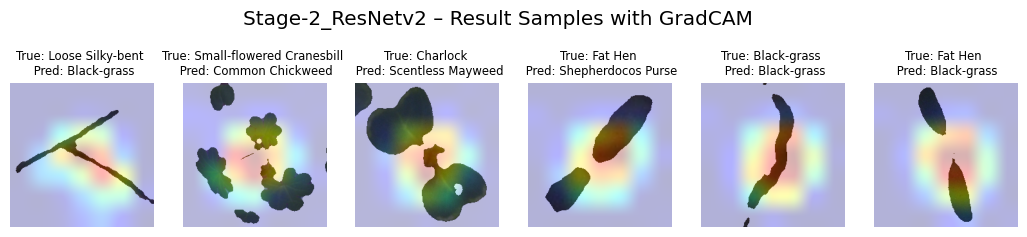

In [51]:
stage2_resnetv3.display_samples(nb=6, gradcam=True, segmented=True)

>>> Stage-2_ResNetv2 –– Display training data samples


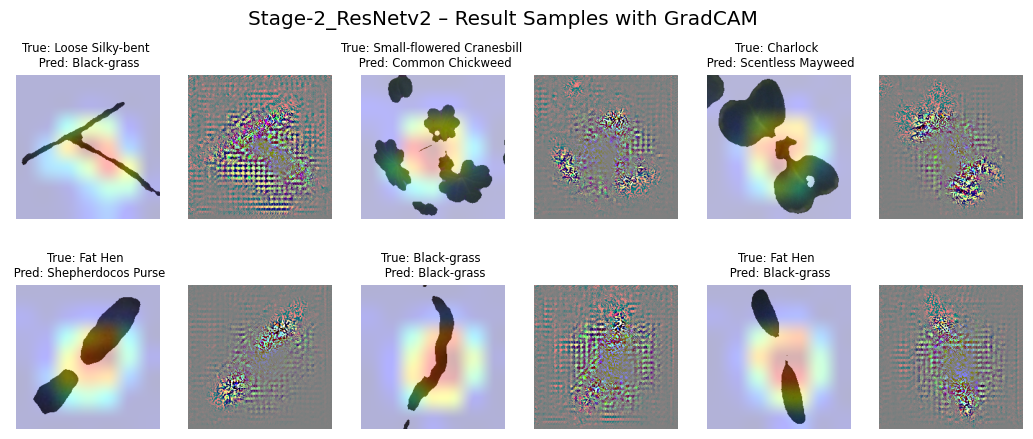

In [52]:
stage2_resnetv3.display_samples(nb=12, gradcam=True, segmented=True, guidedGrad_cam=True)

In [53]:
#### Stage 2
stage2_mobilenetv3 = Stage2MobileNetv3(data)
stage2_mobilenetv3.fit_or_load(campaign_id, training=False)

Found 4387 validated image filenames belonging to 12 classes.
Found 598 validated image filenames belonging to 12 classes.
Found 554 validated image filenames belonging to 12 classes.
>>> Stage-2_MobileNetv3 –– Loading


In [ ]:
stage2_mobilenetv3.evaluate()

>>> Stage-2_MobileNetv3 –– Display training data samples


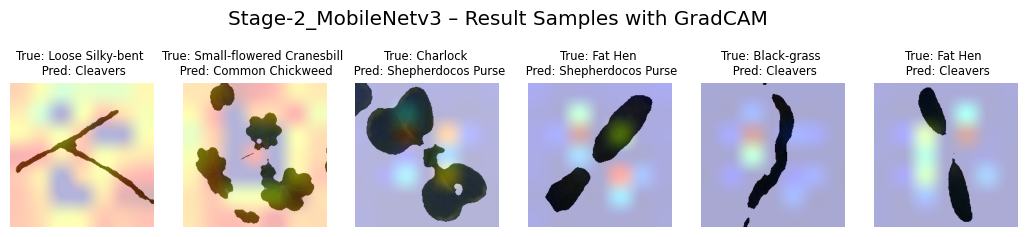

In [55]:
stage2_mobilenetv3.display_samples(nb=6, gradcam=True, segmented=True)

>>> Stage-2_MobileNetv3 –– Display training data samples


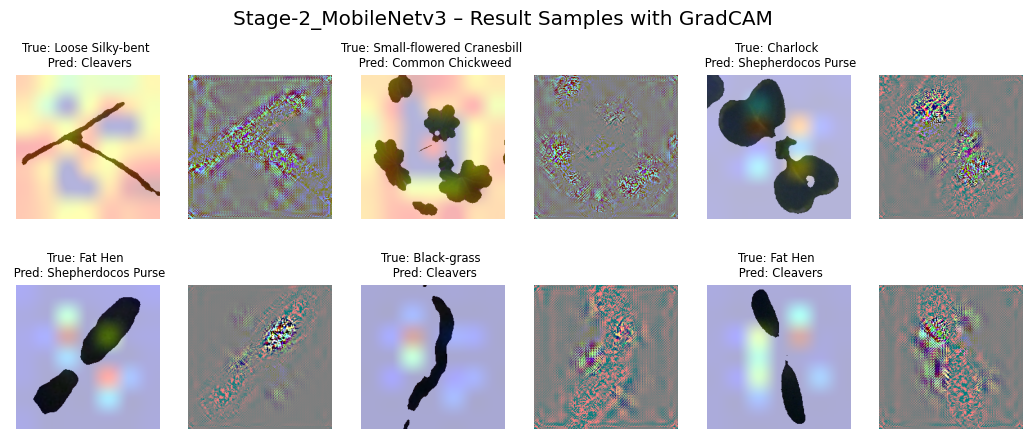

In [56]:
stage2_mobilenetv3.display_samples(nb=12, gradcam=True, segmented=True, guidedGrad_cam=True)

## __Background Removal__

- Two colors : **black** and **white**

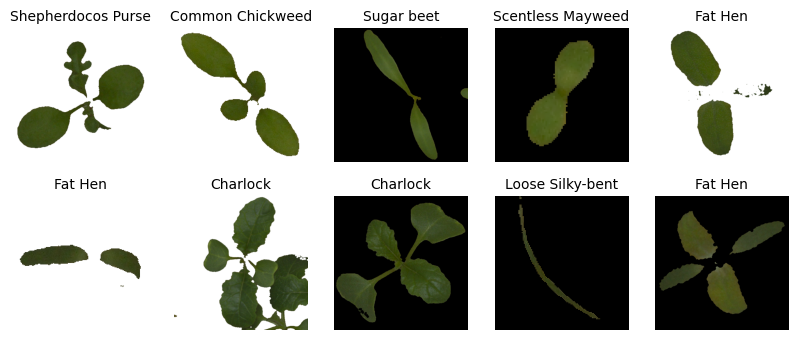

In [57]:
np.random.seed(3)

f, axes = plt.subplots(2, 5, figsize=(10, 4))
colors  = ['white', 'black']
index   = -1
for i in range(2):
    for j in range(5):
        index = random.sample(range(data.dataframe.shape[0]), 1)[0]
        img = data.dataframe.iloc[index]
        img = plt.imread(img.path)
        image_without_bg = lf.segmentation.remove_background(x=tf.constant(img, dtype=tf.float32), color=colors[np.random.choice([0, 1])])
        axes[i, j].axis('off')
        axes[i, j].imshow(image_without_bg)
        axes[i, j].set_title(data.dataframe.label[index], fontsize='medium')

plt.show()

## __Histogram of Colors__

### *```Hyper parameters```* 

- **data** : is a dataframe 
- **select_index** : is a list of integer valeurs use to select images in the dataframe
- **figsize** : is a  tuple to resize figure 

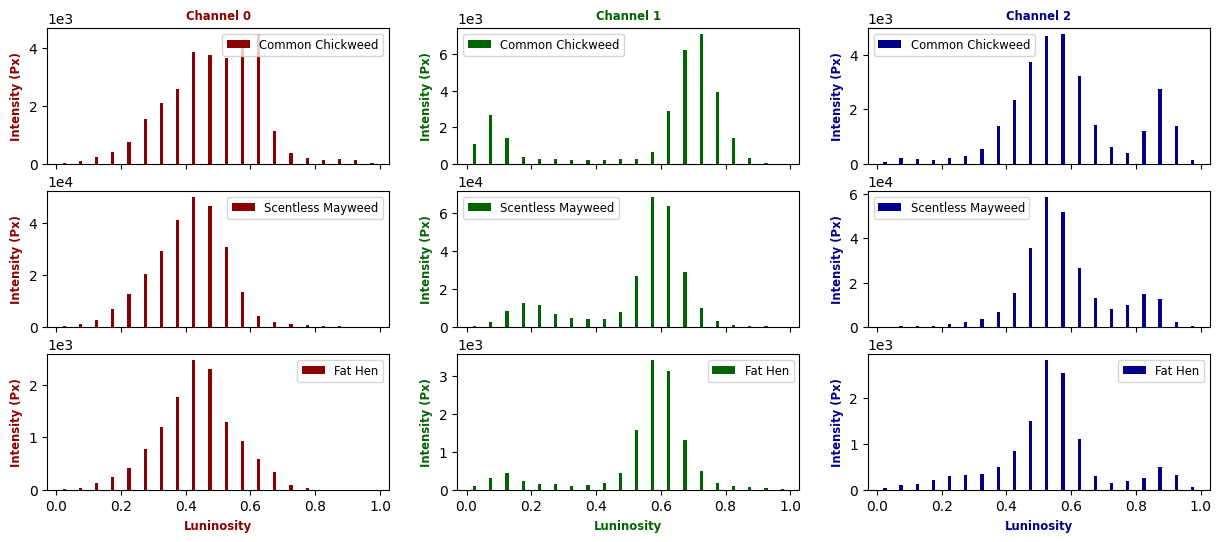

In [58]:
select_index = random.sample(range(data.dataframe.shape[0]), 3)
lf.segmentation.Plot_Histograms(data=data, select_index=select_index , figsize=(15, 6))